# 차원축소
* 차원축소는 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터세트를 생성하는것.
* 차원이 증가할수록 데이터 포인트간의 거리가 기하급수적으로 멀어지고 되고 ,회소(sparse)한 구조를 가지게 됨
* 수백개 이상의 피처로 구성된 데이터세트의 경우 상재적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어짐
* 피처가 많을 경우, 개별 피처간에 상관관계가 높아져 다중 공선성의 문제가 발생할 소지가 다분함(예측성능의 저하)
* 이런 경우, 3차원 이하의 차원 축소를 통해 시각적으로 데이터를 압축해서 표현이 가능하며, 학습데이터의 크기가 줄게 되어 학습에 필요한 처리능력도 줄일수 있음.

차원축소는 아래와 같이 두가지로 나뉠 수 있다.
* 피처 선택(feature selection) - 데이터의 특징을 잘 나타내는 주요 피처만 선택
* 피처 추출(feature extraction) - 기존의 피처를 중요 피처로 압축해서 추출하는 것.

* 차원축소 알고리즘은 이미지 분류, 텍스트 분석에도 사용

## PCA(Principal Component Analysis)
* N개의 M차원 데이ㅓ가 있으면 보통 그 데이터들은 서로 다른 값을 가진다. 하지만 이러한 데이터간의 변이는 무작위가 아니라 특정한 규칙에 의해 만들어지는 경우가 있다. 이러한 데이터간의 변이 규칙을 찾아낼때 PCA를 사용할 수 있다.
* **잠재변수(latent vriable)** 라는 키워드를 기억하고 음미하기(꽃받침 길이와 꽃받침폭을 통해 도출해 내는것)

### 1. 붓꽃 데이터의 차원축소
* 표본 10개의 붓꽃 데이터를 선택하여 꽃받침 길이아 꽃받침 폭 데이터 보기 

In [20]:
import seaborn as sns
import pandas as pd
import numpy as np

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [18]:
def show_relation(n_samples):
    X = iris.data[:n_samples, :2] # 샘플의 갯수만큼 가져오되 꽃받침길이와 꽃받침 폭
    plt.figure(figsize = (12, 8))
    plt.plot(X.T, 'o:')  
    plt.xticks(range(4), labels = ['꽃받침 길이', '꽃받침 폭'])
    plt.xlim(-0.5, 2)
    plt.ylim(2.5, 6)
    plt.title("붓꽃 크기 특성")
    plt.legend(["표본 {}".format(i + 1) for i in range(n_samples)])
    plt.grid()
    plt.show()

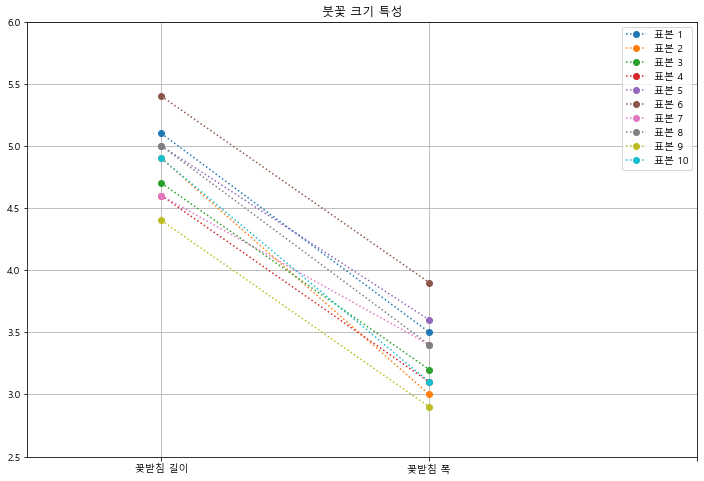

In [19]:
# 꽃받침길이가 크면 꽃받침 폭도 크다는 것을 보여줌.
show_relation(n_samples = 10)

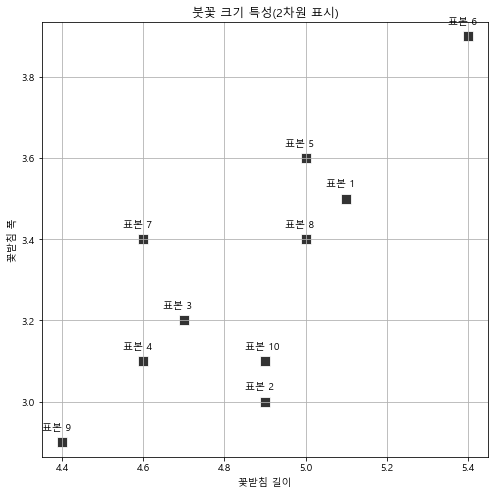

In [25]:
n_samples = 10
X = iris.data[:n_samples, :2]
plt.figure(figsize = (8, 8))
ax  = sns.scatterplot(0, 1, data = pd.DataFrame(X), s = 100, color = '.2', marker = 's')

for i in range(n_samples):
    ax.text(X[i, 0] - 0.05, X[i, 1] + 0.03, '표본 {}'.format(i + 1))  # annotation의 위치 좌표
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("붓꽃 크기 특성(2차원 표시)")
plt.axis('equal')
plt.grid()
plt.show()

**차원축소와 투영**
- 차원축소문제는 다차원 벡터를 더 낮은 차원의 벡터고간에 투영하는 문제.즉, 특잇값 분해에성 살펴본 로우-랭크 근사(low-rank approximation)

**사이킷런의 PCA기능**
- 사이킷런의 decomposition서브 패키지에서 제공
- 입력인수  : `n_components : 정수`
- 메소드
 
 -. fit_transform() : 특징행열을 낮은 차원의 근사행렬로 변환
 
 -. inverse_transform() : 변환된 근사행열을 원래의 차원으로 복귀
- 속성
 
 -. mean_ : 평균벡터
 
 -. components_ : 주성분 벡터

**붓꽃데이터를 1차원으로 차원 축소**

In [27]:
from sklearn.decomposition import PCA

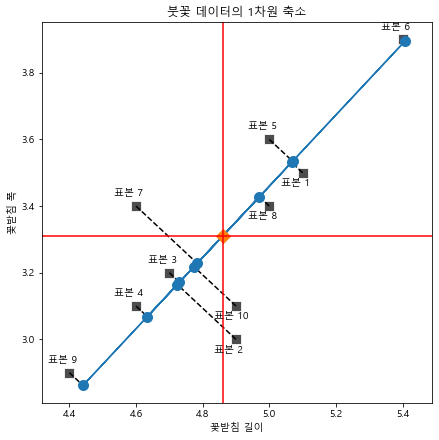

In [45]:
pca1 = PCA(n_components = 1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

plt.figure(figsize = (7, 7))
ax = sns.scatterplot(0, 1, data = pd.DataFrame(X), s = 100, color = '.3', marker = 's')  # 마커는 사각형, 색상은 1에 가까우면 회색
for i in range(n_samples):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, '표본 {}'.format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], 'k--')
    
plt.plot(X2[:, 0], X2[:, 1], 'o-', markersize = 10)  # 2차원근사한 근사데이터 집합
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize = 10, marker = 'D')  # 가운데 꽃받침길이와 폭의 평균값을 좌표로 갖는 다각형 마커

plt.axvline(X[:, 0].mean(), c = 'r') # 가운데 빨간 점 꽃받침 길이의 평균값을 좌표로 갖는 수직선 라인
plt.axhline(X[:, 1].mean(), c = 'r') # 가운데 빨간 점 꽃받침 폭의 평균값을 좌표로 갖는 수평선 라인
plt.grid(False)
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("붓꽃 데이터의 1차원 축소")
plt.axis('equal')
plt.show()

In [46]:
# 데이터의 평균값 
pca1.mean_

array([4.86, 3.31])

In [48]:
# 주성분 벡터 즉, 가장 근사 데이터를 만드는 단위기저벡터 
# 평균을 제거한 특징행렬의 첫번째 오른쪽 특이벡터 또는 그 행렬의 분산행렬의 첫번째 (가장 큰 고윳값에 대응하는) 고유벡터에 해당한다.
# 고유벡터의 부호 즉 방향은 반대가 될 수도 있다.
pca1.components_

array([[0.68305029, 0.73037134]])

In [56]:
help(np.linalg.svd)

Help on function svd in module numpy.linalg:

svd(a, full_matrices=True, compute_uv=True, hermitian=False)
    Singular Value Decomposition.
    
    When `a` is a 2D array, it is factorized as ``u @ np.diag(s) @ vh
    = (u * s) @ vh``, where `u` and `vh` are 2D unitary arrays and `s` is a 1D
    array of `a`'s singular values. When `a` is higher-dimensional, SVD is
    applied in stacked mode as explained below.
    
    Parameters
    ----------
    a : (..., M, N) array_like
        A real or complex array with ``a.ndim >= 2``.
    full_matrices : bool, optional
        If True (default), `u` and `vh` have the shapes ``(..., M, M)`` and
        ``(..., N, N)``, respectively.  Otherwise, the shapes are
        ``(..., M, K)`` and ``(..., K, N)``, respectively, where
        ``K = min(M, N)``.
    compute_uv : bool, optional
        Whether or not to compute `u` and `vh` in addition to `s`.  True
        by default.
    hermitian : bool, optional
        If True, `a` is assumed to be

In [59]:
# 넘파이로 첫번째 오른쪽 특이벡터 구하기 
X0 = X - X.mean(axis = 0)
X0

U, S, VT = np.linalg.svd(X0)
VT

array([[-0.68305029, -0.73037134],
       [-0.73037134,  0.68305029]])

In [61]:
VT[:, 0]

array([-0.68305029, -0.73037134])

In [62]:
help(np.linalg.eig)

Help on function eig in module numpy.linalg:

eig(a)
    Compute the eigenvalues and right eigenvectors of a square array.
    
    Parameters
    ----------
    a : (..., M, M) array
        Matrices for which the eigenvalues and right eigenvectors will
        be computed
    
    Returns
    -------
    w : (..., M) array
        The eigenvalues, each repeated according to its multiplicity.
        The eigenvalues are not necessarily ordered. The resulting
        array will be of complex type, unless the imaginary part is
        zero in which case it will be cast to a real type. When `a`
        is real the resulting eigenvalues will be real (0 imaginary
        part) or occur in conjugate pairs
    
    v : (..., M, M) array
        The normalized (unit "length") eigenvectors, such that the
        column ``v[:,i]`` is the eigenvector corresponding to the
        eigenvalue ``w[i]``.
    
    Raises
    ------
    LinAlgError
        If the eigenvalue computation does not converg

In [63]:
# 고윳값분해을 할때는 넙파이가 고윳값의 순서에 따른 정렬을 해주지 않으므로 사용자가 정렬해야 함.
XCOV = X0.T @ X0
W, V = np.linalg.eig(XCOV)

In [64]:
W

array([0.17107711, 1.44192289])

In [65]:
V

array([[-0.73037134, -0.68305029],
       [ 0.68305029, -0.73037134]])

In [69]:
np.argmax(W)  # 큰 값의 인덱스값을 반환
V[:, np.argmax(W)] # 가져오는 방법 참조

array([-0.68305029, -0.73037134])

In [71]:
# 8번째 꽃의 꽃받침 길이와 꽃받침 폭 
X[7, :]

array([5. , 3.4])

In [73]:
# PCA로 구한 주성분의 값 즉, 꽃의 크기
X_low[7]

array([0.16136046])

In [75]:
pca1.components_ @ (X[7, :] - pca1.mean_)  #해당방법으로 구할 수 있다.

array([0.16136046])

In [77]:
# 주성분으리 값을 이용하여 다시 2차원값으로 나타낸 근사값
X2[7, :]

array([4.97021731, 3.42785306])

### 3.5.1 연습문제

붓꽃데이터 중 파에서 데이터(setosa) 50개에 대해서 다음 문제를 풀어라.
* 1)꽃잎의 길이와 꽃잎 폭을 이용해  1차원 PCA수행.꽃의 크기는 꽃잎 길이와 꽃잎 폭의 어떤 선형조합으로 나타나는가
* 2) 꽃받침 길이와 폭, 꽃잎 길이와 폭, 이 4가지 변수를 모두 사용하여 1차원 PCA를 수행.꽃의 크기는 관측 데이터의 어떤 선형조합으로 나타나는가?

#### 1)번 문제

In [2]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [6]:
X = load_iris().data
pca = PCA(n_components = 1)
pca.fit_transform(X[:50, 2:])  # 50개의 샘플, 꽃잎의 길이와 폭
pca.components_

array([[0.96004653, 0.27984043]])

#### 2)번 문제

In [7]:
pca = PCA(n_components = 1)
pca.fit_transform(X[:50, :])  # 50개의 샘플, 꽃받침의 길이와 폭, 꽃잎의 길이와 폭 이용
pca.components_

array([[0.6690784 , 0.73414783, 0.0965439 , 0.06356359]])

## 2. 이미지 PCA
* 사람의 얼굴 데이터를 PCA로 분석

In [20]:
from sklearn.datasets import fetch_olivetti_faces

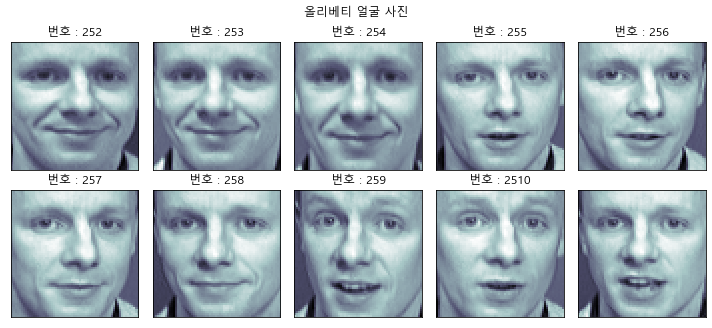

In [21]:
faces_all = fetch_olivetti_faces()

k = 20  # 20번 인물의 사진만 선택
faces = faces_all.images[faces_all.target == k]

N = 2
M = 5

fig = plt.figure(figsize = (10, 5))
plt.subplots_adjust(top = 1, bottom = 0, hspace = 0, wspace = 0.05) # plot의 레이아웃 설정
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax.set_title("번호 : {0}{1}{2}".format(N,M,k + 1))
        ax = fig.add_subplot(N, M, k + 1)
        ax.imshow(faces[k], cmap = plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("올리베티 얼굴 사진")
plt.tight_layout()
plt.show()

In [81]:
help(faces_all)

Help on Bunch in module sklearn.utils object:

class Bunch(builtins.dict)
 |  Bunch(**kwargs)
 |  
 |  Container object exposing keys as attributes
 |  
 |  Bunch objects are sometimes used as an output for functions and methods.
 |  They extend dictionaries by enabling values to be accessed by key,
 |  `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
 |  
 |  Examples
 |  --------
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __getattr__(self, key)
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(self, key, value)
 |      Implement setattr(self, name, value).
 |  
 |  __setstate__(self, state)
 |  
 |  ----------

**주성분이 2개인 PCA분석**

In [22]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components = 2)
X3 = faces_all.data[faces_all.target == k]
W3 = pca3.fit_transform(X3)
X32 = pca3.inverse_transform(W3)

**주성분분석으로 근사화한 이미지표시**

In [23]:
X32.shape

(10, 4096)

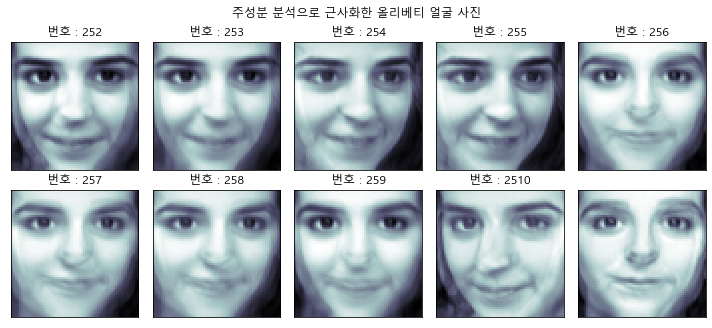

In [24]:
# 모두 평균값과 2개의 주성분 얼굴의 각기 다른 선형조합
N = 2
M = 5

fig = plt.figure(figsize = (10, 5))
plt.subplots_adjust(top = 1, bottom = 0, hspace = 0, wspace = 0.05) # plot의 레이아웃 설정
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax.set_title("번호 : {0}{1}{2}".format(N,M,k + 1))
        ax = fig.add_subplot(N, M, k + 1)
        ax.imshow(X32[k].reshape(64, 64), cmap = plt.cm.bone)  # 4096을 64 * 64로 바꿈.
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("주성분 분석으로 근사화한 올리베티 얼굴 사진")
plt.tight_layout()
plt.show()

* 평균값과 2개의 주성분이 나타내는 얼굴을 이미지로 표시하면 아래와 같다.

주성분이 나타내는 얼굴을 **아이겐패이스Eigen face** 라고 함.

In [25]:
display(pca3.mean_)

array([0.39917356, 0.4710744 , 0.5491736 , ..., 0.13140495, 0.14958677,
       0.16033058], dtype=float32)

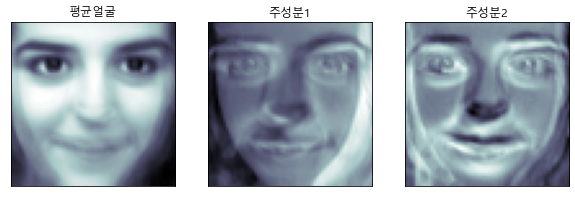

In [26]:
face_mean = pca3.mean_.reshape(64, 64)
face_p1 = pca3.components_[0].reshape(64, 64)
face_p2 = pca3.components_[1].reshape(64, 64)

plt.figure(figsize = (10, 5))
plt.subplot(131)
plt.imshow(face_mean, cmap = plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("평균얼굴")

plt.subplot(132)
plt.imshow(face_p1, cmap = plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분1")

plt.subplot(133)
plt.imshow(face_p2, cmap = plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분2")
plt.show()

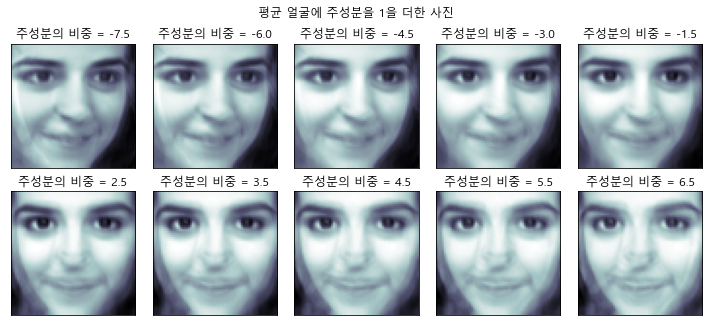

In [27]:
# 평균얼굴에 주성분을 더한 얼굴 모습
# 주성분 1은 주성분1 이 음수의 값은 왼쪽을 바라본 얼굴 이미지.
# 양수는 오른쪽을 바라본 얼굴 이미지.
N = 2
M = 5

fig = plt.figure(figsize = (10, 5))
plt.subplots_adjust(top = 1, bottom = 0, hspace = 0, wspace = 0.05) # plot의 레이아웃 설정
for i in range(N):
    for j in range(M):
        k = i * M + j
        w = 1.5 * (k - 5) if k < 5 else 1.5 + (k - 4)
        ax = fig.add_subplot(N, M, k + 1)
        ax.imshow(face_mean + w * face_p1,cmap = plt.cm.bone)  # 4096을 64 * 64로 바꿈.
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분의 비중 = {}". format(w))
plt.suptitle("평균 얼굴에 주성분을 1을 더한 사진")
plt.tight_layout()
plt.show()

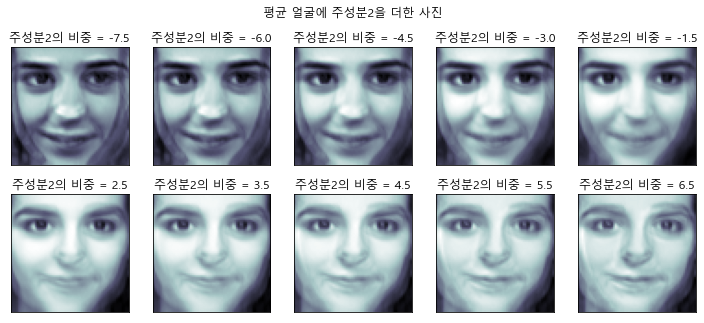

In [28]:
# 평균얼굴에 주성분2을 더한 얼굴 모습
# 음수값은 
N = 2
M = 5

fig = plt.figure(figsize = (10, 5))
plt.subplots_adjust(top = 1, bottom = 0, hspace = 0, wspace = 0.05) # subplot간의 간격 설정 , wspace - 축너비, hspace - 축높이
for i in range(N):
    for j in range(M):
        k = i * M + j
        w = 1.5 * (k - 5) if k < 5 else 1.5 + (k - 4)
        ax = fig.add_subplot(N, M, k + 1)
        ax.imshow(face_mean + w * face_p2,cmap = plt.cm.bone)  # 4096을 64 * 64로 바꿈.
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분2의 비중 = {:.1f}". format(w))
plt.suptitle("평균 얼굴에 주성분2을 더한 사진")
plt.tight_layout()
plt.show()

### 3.5.2 연습문제
올리베티 얼굴 이미지에서 다른 사람의 얼굴을 선택하여 위와 두 가지 주성분을 구하라. 각 주성분은 어떤 이미지 특성을 나타내는가?

In [10]:
from sklearn.datasets import fetch_olivetti_faces

In [11]:
faces_all = fetch_olivetti_faces()

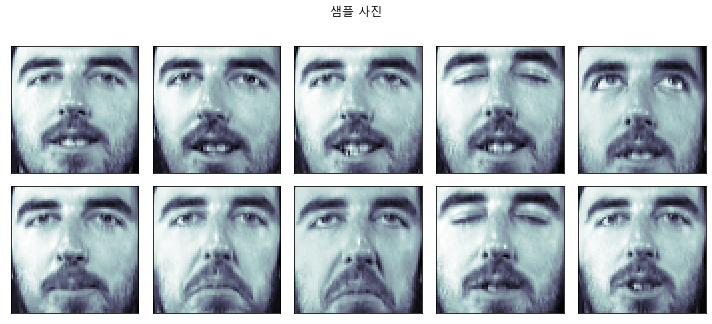

In [21]:
from sklearn.decomposition import PCA
k = 10
faces = faces_all.images[faces_all.target == k]

N = 2 # 로우수 
M = 5 # 열의 수

fig = plt.figure(figsize = (10, 5))
plt.subplots_adjust(top = 1, bottom = 0, hspace = 0, wspace = 0.05)

for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k + 1)
        ax.imshow(faces[k], cmap = plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("샘플 사진")
plt.tight_layout()
plt.show()

In [13]:
# 주성분이 2개인 PCA분석
from sklearn.decomposition import PCA

pca2 = PCA(n_components = 2)
X2 = faces_all.data[faces_all.target == k]
X2

array([[0.3264463 , 0.48347107, 0.5247934 , ..., 0.08264463, 0.0661157 ,
        0.0785124 ],
       [0.29338843, 0.4090909 , 0.53305787, ..., 0.08264463, 0.07438017,
        0.08677686],
       [0.57024795, 0.59917355, 0.6487603 , ..., 0.0661157 , 0.08264463,
        0.09504132],
       ...,
       [0.38842976, 0.49173555, 0.5495868 , ..., 0.08264463, 0.08264463,
        0.07438017],
       [0.09917355, 0.0661157 , 0.32231405, ..., 0.5       , 0.5289256 ,
        0.553719  ],
       [0.40082645, 0.5165289 , 0.56198347, ..., 0.11983471, 0.16115703,
        0.15289256]], dtype=float32)

In [14]:
W2 = pca2.fit_transform(X2)
W2_INVRS = pca2.inverse_transform(W2)
display(W2_INVRS, W2)

array([[0.31714234, 0.36583185, 0.48897338, ..., 0.21402769, 0.23132572,
        0.25146046],
       [0.41522735, 0.4728365 , 0.55340385, ..., 0.13635004, 0.15757838,
        0.17561495],
       [0.58335435, 0.6349662 , 0.65530944, ..., 0.02706686, 0.05827983,
        0.08303931],
       ...,
       [0.32937986, 0.4065855 , 0.5079987 , ..., 0.17361505, 0.18722248,
        0.19381067],
       [0.07399794, 0.12307173, 0.33827472, ..., 0.381365  , 0.38548797,
        0.39991847],
       [0.34837973, 0.46845195, 0.53697306, ..., 0.11244857, 0.12054074,
        0.10677897]], dtype=float32)

array([[ 1.4660358 , -3.2781909 ],
       [-1.3654575 , -1.6277132 ],
       [-7.437871  , -1.3633481 ],
       [-7.670159  , -2.3037148 ],
       [ 2.0852277 ,  2.36735   ],
       [-1.5912728 ,  2.988774  ],
       [-2.4311528 ,  2.1408002 ],
       [ 2.6820245 ,  0.22944973],
       [ 9.773263  , -4.6592155 ],
       [ 4.489362  ,  5.5058074 ]], dtype=float32)

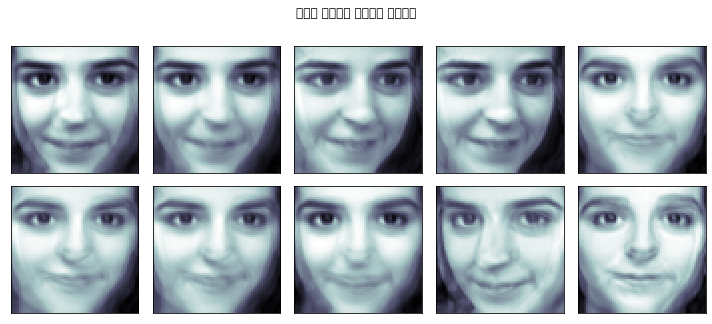

In [15]:
N = 2 # 행의 수 
M = 5 # 컬럼 수 

fig  = plt.figure(figsize = (10, 5))
plt.subplots_adjust(top = 1, bottom = 0, hspace = 0, wspace = 0.05)

for i in range(N):
    for j in range(M):
        k = i * M + j
        
        ax = fig.add_subplot(N,M,k+1)
        ax.imshow(W2_INVRS[k].reshape(64, 64), cmap = plt.cm.bone)
        ax.grid(True)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("주성분 분석으로 근사화한 샘플사진")
plt.tight_layout()
plt.show()

In [16]:
display(pca2.components_, pca2.mean_)

array([[-0.02712573, -0.02580412, -0.0162996 , ...,  0.01723496,
         0.01557002,  0.01431373],
       [ 0.01289246,  0.02056403,  0.01107453, ..., -0.01749614,
        -0.01797111, -0.02139761]], dtype=float32)

array([0.39917356, 0.4710744 , 0.5491736 , ..., 0.13140495, 0.14958677,
       0.16033058], dtype=float32)

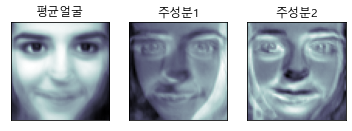

In [22]:
face_mean = pca2.mean_.reshape(64, 64)
face_p1 = pca2.components_[0].reshape(64, 64)
face_p2 = pca2.components_[1].reshape(64, 64)

plt.subplot(131)
plt.imshow(face_mean, cmap = plt.cm.bone)
plt.grid(False)
plt.yticks([])
plt.xticks([])
plt.title('평균얼굴')
plt.subplot(132)
plt.imshow(face_p1, cmap= plt.cm.bone)
plt.grid(False)
plt.yticks([])
plt.xticks([])
plt.title('주성분1')

plt.subplot(133)
plt.imshow(face_p2, cmap= plt.cm.bone)
plt.grid(False)
plt.yticks([])
plt.xticks([])
plt.title('주성분2')

plt.show()

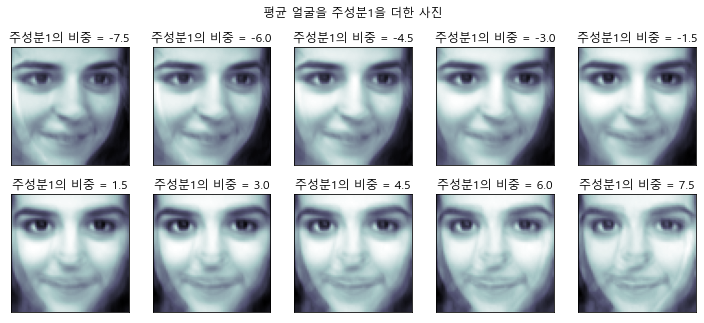

In [23]:
# 평균얼굴을 주성분 1을 더한 결과 
N = 2
M = 5
fig = plt.figure(figsize = (10, 5))
plt.subplots_adjust(top = 1, bottom = 0, hspace = 0, wspace = 0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k + 1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        
        ax.imshow(face_mean + w * face_p1, cmap = plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분1의 비중 = {}".format(w))
plt.suptitle("평균 얼굴을 주성분1을 더한 사진")        
plt.tight_layout()
plt.show()

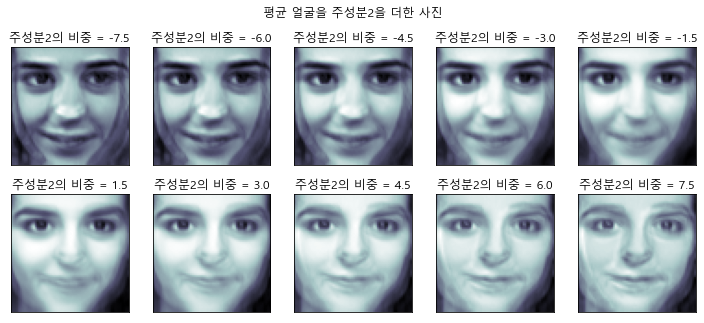

In [24]:
# 평균얼굴을 주성분2를 더한 결과 - 미소짓는 얼굴과 아닌 얼굴
N = 2
M = 5
fig = plt.figure(figsize = (10, 5))
plt.subplots_adjust(top = 1, bottom = 0, hspace = 0, wspace = 0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k + 1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        
        ax.imshow(face_mean + w * face_p2, cmap = plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분2의 비중 = {}".format(w))
plt.suptitle("평균 얼굴을 주성분2을 더한 사진")        
plt.tight_layout()
plt.show()

### 붓꽃데이터셋트 PCA변환

In [27]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
iris = load_iris()

#넘파이 데이터세트를 판다스 데이터세트로 변환
iris.feature_names
columns = ['sepal length','sepal width','petal length','petal width']

irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target

irisDF.head(3)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


**붓꽃데이터 2차원 시각화**

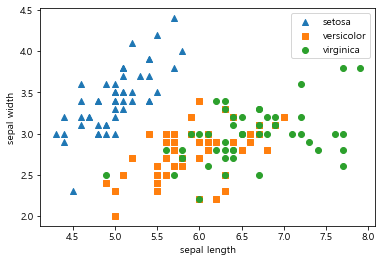

In [43]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미
marker = ['^', 's', 'o']

for i, marker in enumerate(marker):
    x_axis_data = irisDF[irisDF['target']== i]['sepal length']
    y_axis_data = irisDF[irisDF['target']== i]['sepal width']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
plt.legend()
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

**PCA적용전 개별속성 스케일링**
* PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받습니다.따라서 여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는것이 필요

In [46]:
from sklearn.preprocessing import StandardScaler

# target을 제외한 모든 속성값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, : -1])

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

# fit()과 transform()을 호출해 PCA변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
display(iris_pca.shape)

(150, 2)

In [50]:
# PCA변환된 데이터의 칼럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_components_1', 'pca_components_2']

irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_components_1,pca_components_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


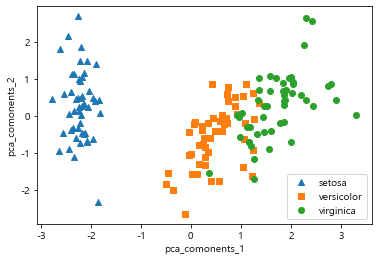

In [52]:
# PCA변환된 데이터셋트를 2차원상에서 시각화
# setosa를 세모, versicolor를 네모, viriginica를 동그라미로 표시
markers = ['^', 's', 'o']

# pca_components_!을 x축, pca_components_2를 y축으로 scatter plot수행
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_components_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_components_2']
    
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_comonents_1')
plt.ylabel('pca_comonents_2')
plt.show()

* PCA components별로 원본 데이터의 변동성을 얼마나 반영하고있는지 알아보자.

In [55]:
# 첫번째 pca_components_1이 전체 변동성의 약 72.9퍼센트 ,두번째 pca_components_2가 전체 변동성의 22.8퍼센트를 차지.
# PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 이상 설명 가능하다는 결론이 나옴.
display(pca.explained_variance_ratio_)

array([0.72962445, 0.22850762])

* 원본 붓꽃 데이터셋트와 PCA로 변환된 데이터에 각각 분류 적용후 결과 비교

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring = 'accuracy', cv = 3)
print("원본 데이터 교차 검증 개별 정확도 : ", scores)
print("원본 데이터 교차 검증 평균 정확도 : ", np.mean(scores))

원본 데이터 교차 검증 개별 정확도 :  [0.98 0.94 0.96]
원본 데이터 교차 검증 평균 정확도 :  0.96


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state = 156)

pca_X = irisDF_pca[['pca_components_1', 'pca_components_2']]

scores = cross_val_score(rcf, pca_X, iris.target, scoring = 'accuracy', cv = 3)
print("원본 데이터 교차 검증 개별 정확도 : ", scores)
print("원본 데이터 교차 검증 평균 정확도 : ", np.mean(scores))

원본 데이터 교차 검증 개별 정확도 :  [0.88 0.88 0.88]
원본 데이터 교차 검증 평균 정확도 :  0.88


### 신용카드 사용내역 데이터세트

In [71]:
df = pd.read_excel("../../08.Kaggle_Dacon/data/UCI_Credit_Card/credit_card.xls", header = 1).iloc[:, 1:]

In [74]:
df.head(n = 3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [76]:
display(df.shape[0], df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

30000

None

In [78]:
df.rename(columns = {"PAY_0":"PAY_1", "default payment next month": "default"}, inplace = True)
y_target = df['default']
X_features = df.drop('default', inplace = False, axis = 1)

In [83]:
display(X_features.head(5), y_target)  # 연체 - 1, 정상납부  - 0

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: int64

* 피처간 상관관계 히트맵 시각화

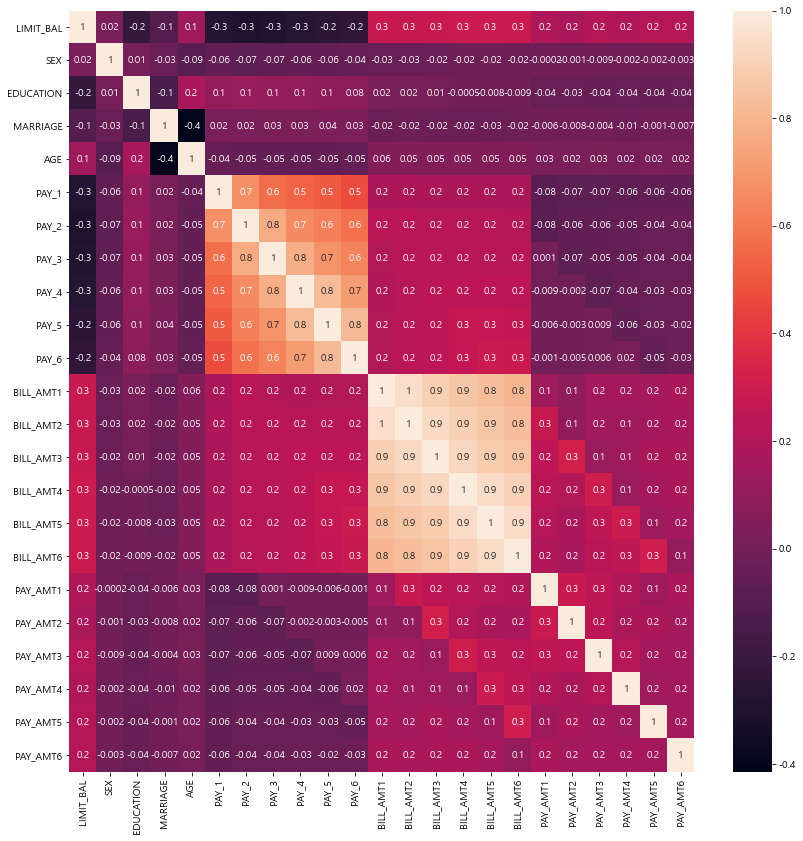

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize = (14, 14))
sns.heatmap(corr, annot = True, fmt = '.1g')

In [91]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)]
print("대상 속성명 : ", cols_bill)

대상 속성명 :  ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


In [95]:
# 2개의 PCA속성을 가진 PCA객체 생성하고, explained_variance_ration_계산을 위해 fit()호출 
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

pca = PCA(n_components = 2)
pca.fit(df_cols_scaled)
print("PCA Component별 변동성 : ", pca.explained_variance_ratio_)

PCA Component별 변동성 :  [0.90555253 0.0509867 ]


**원본데이터를 이용한 RandomForestClassifier**

In [98]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators = 300, random_state = 156)
scores = cross_val_score(rcf,X_features, y_target, scoring = 'accuracy', cv = 3)

print("cv=3 인 경우의 개별 Fold세트별 정확도 : ", scores)
print("평균 정확도  : {0:.4f}".format(np.mean(scores))) 

cv=3 인 경우의 개별 Fold세트별 정확도 :  [0.8083 0.8196 0.8232]
평균 정확도  : 0.8170


**PCA변환한 데이터셋트를 이용한 RandomForestClassifier**

In [100]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에게 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 컴포넌트를 가진 PCA변환을 수행하고 cross_val_score()로 분류 예측 수행
pca = PCA(n_components = 6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring = 'accuracy', cv = 3)

print("cv=3 인 경우의 개별 Fold세트별 정확도 : ", scores_pca)
print("평균 정확도  : {0:.4f}".format(np.mean(scores_pca))) 

cv=3 인 경우의 개별 Fold세트별 정확도 :  [0.7917 0.7985 0.8026]
평균 정확도  : 0.7976


* 전체 23개의 속성중 6개의 PCA컴포넌트 만으로도 원본 데이터를 기반으로 예측치보다 1~ 2포인트 정도 성능치저하만 가져왔다는 것은 PCA의 뛰어난 압축능력을 보여주는 것.
* PCA는 차원축소를 통해 데이터를 쉽게 인지하는데 활용할수있습니다만, 이보다 더 활발하게 활용되는 분야는 컴퓨터비전분야이다.
* **컴퓨터 비젼**